Thomas Dougherty

Probability and Statistics for Computer Science


### Analysis of the On-Time Performance (OTP) of New Jersey Transit Commuter Rail<br>
On-time performance refers to the level of success of a service adhering to its schedule. In this example I'll be exploring NJT commuter rail from March 2018 to March 2020. On-time performance data can be used for schedule planning, passenger information systems, and comparison to weather data. 
    

In [81]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import random
import scipy.stats as stats
from csv_funct import *
from helper_functions import *
from math import floor, ceil



#### Data cleanup

In [82]:
#all_services = csv.combine_csvs(r"data/services/")
print("Reading CSV....")
all_services = pd.read_csv(r"data/all_services.csv")
all_services = csv.format_services(all_services)
weather = pd.read_csv(r"data/weather.csv")
weather = csv.format_weather(weather)
all_services

Reading CSV....
Dropping columns...
Changing datatypes...
Done formatting dataframe
Formatting weather dataframe...
Changing datatypes...
Dropping columns...
Done formatting weather dataframe


,date,train_id,from,to,scheduled_time,actual_time,delay_minutes,line
0,2018-03-01,3805,New York Penn Station,New York Penn Station,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,Northeast Corrdr
1,2018-03-01,3805,New York Penn Station,Secaucus Upper Lvl,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133301,Northeast Corrdr
2,2018-03-01,3805,Secaucus Upper Lvl,Newark Penn Station,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116638,Northeast Corrdr
3,2018-03-01,3805,Newark Penn Station,Newark Airport,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166626,Northeast Corrdr
4,2018-03-01,3805,Newark Airport,North Elizabeth,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166626,Northeast Corrdr
...,...,...,...,...,...,...,...,...
6033828,2020-05-18,5529,Plainfield,Dunellen,2020-05-18 17:16:00,2020-05-18 17:19:10,3.166016,Raritan Valley
6033829,2020-05-18,5529,Dunellen,Bound Brook,2020-05-18 17:21:00,2020-05-18 17:24:06,3.099609,Raritan Valley
6033830,2020-05-18,5529,Bound Brook,Bridgewater,2020-05-18 17:24:00,2020-05-18 17:27:11,3.183594,Raritan Valley
6033831,2020-05-18,5529,Bridgewater,Somerville,2020-05-18 17:30:00,2020-05-18 17:33:07,3.117188,Raritan Valley


## Visualization of On Time Performance

#### All Services by Season

Using the date column, arrivals will be divided into four primary categories. The arrivals will be sub-categorized by how many minutes late then plotted onto a pie chart to show on time performance in the seasons of the year. <br>
Pie charts will be used to show the breakdown of how late trains are relative to all trains in the given time periods.

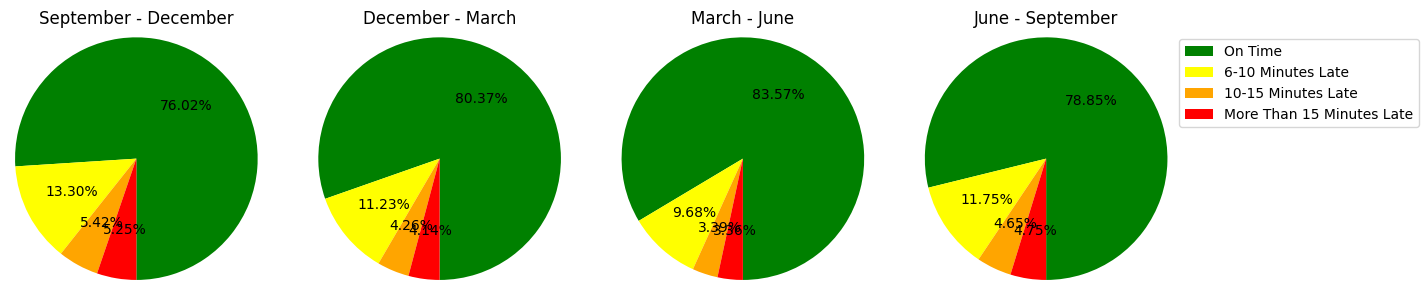

In [83]:
late_labels = ['On Time', '6-10 Minutes Late', '10-15 Minutes Late', 'More Than 15 Minutes Late']
late_colors = ['green', 'yellow', 'orange', 'red']

data_fall = helper.count_lateness(all_services[(all_services['date'].dt.month >= 9) & (all_services['date'].dt.month <= 12)])
# could not get a 'true' boolean value for the winter months and had to broken up into two separate dfs
df1 = all_services[(all_services['date'].dt.month <= 3)]
df2 = all_services[(all_services['date'].dt.month >= 12)]
result = pd.concat([df1,df2])
data_winter = helper.count_lateness(result) 
data_spring = helper.count_lateness(all_services[(all_services['date'].dt.month >= 3) & (all_services['date'].dt.month <=6)])
data_summer = helper.count_lateness(all_services[(all_services['date'].dt.month >= 6) & (all_services['date'].dt.month <=9)])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ax1.pie(data_fall, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax1.title.set_text('September - December')
ax2.pie(data_winter, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax2.title.set_text('December - March')
ax3.pie(data_spring, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax3.title.set_text('March - June')
ax4.pie(data_summer, colors=late_colors, radius = 1.2, autopct = "%0.2f%%", startangle=270)
ax4.title.set_text('June - September')

fig.set_figwidth(15)
fig.set_figheight(5)

plt.legend(bbox_to_anchor = (1.0, 1.0), labels = late_labels)
plt.show()

In Autumn, tree leaves tend to fall on the rails. As they're crushed by the weight of the trains, the wheels of the train and the rails they ride on become coated in a low-friction residue. The buildup is incremental with each passing train. So unlike snow, the buildup cannot be prevented by the regular running of trains. These condition makes it difficult for trains to accelerate, decelerate, and maintain safe speeds leading to delays and other service disruptions so we can expect a lower On Time Performance during the autumn months. 

### Reporting to Final Destination On Time: New York Penn Station vs Hoboken Terminal<br>
New York Penn and Hoboken Terminal are two major termini for New Jersey Transit. However, New York Penn is the busiest transportation facility in the western hemisphere serving both commuter and intercity trains whereas Hoboken terminal serves exclusively commuter rail. The North River Tunnels that connect to NYP are aging pieces of infrastructure as well. Built over a century ago, the tunnels under the Hudson River have been experienced flooding, electrical problems, and other issues. The tunnels are operating at capacity and frequently result in congestion and delays.<br>

For easy comparison, bar charts will be used to visualize the OTP of both stations at different peak times. The values between Hoboken and New York Penn are close, so to highlight the difference the limit of the Y-axis has been set to 25 <br>


1


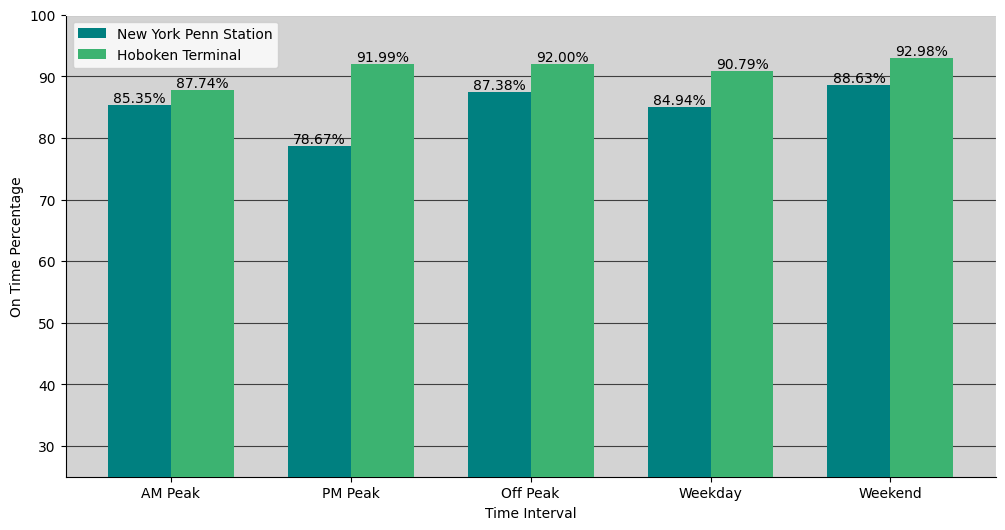

In [84]:
categories = ['AM Peak', 'PM Peak', 'Off Peak', 'Weekday', 'Weekend']

nyp_otps = helper.otp_for_destination(all_services,'New York Penn Station')

hob_otps = helper.otp_for_destination(all_services,'Hoboken')

bar_width = 0.35
index = np.arange(5)
fig, ax = plt.subplots(figsize=(12,6))
nyp = ax.bar(index,nyp_otps, bar_width, label='New York Penn Station', color='teal',zorder=3)
hob = ax.bar(index+bar_width, hob_otps,bar_width, label='Hoboken Terminal', color='mediumseagreen',zorder=3)

ax.set_ylabel('On Time Percentage')
ax.set_ylim(25,100)
ax.set_xlabel('Time Interval')
ax.set_xticks(index+bar_width / 2)
ax.set_xticklabels(categories)
ax.set_facecolor('lightgray')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

ax.legend()
print(1)

for i, bar in enumerate(nyp + hob):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='bottom')

ax.grid(axis='y', linestyle='-', alpha=0.7,color='black',zorder=1)

plt.show()

## Standard Deviation <br>
An error bar chart will be plotted to show the standard deviation over time. This can be useful for identifying trends and sources of error. If standard deviation is going up over time, then service is more consistent and reliable. If it is going down, service is getting less consistent. <br>

At any given point, low standard deviation indicates that a rail service is consistent in achieving its scheduled arrival times. A higher standard deviation of on-time performance can be interpreted as less reilable or consistent service. It can also indicate inefficient routing of trains or an un-optimized train schedule. <br>


/tmp/ipykernel_30229/2425598573.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, rotation=90)


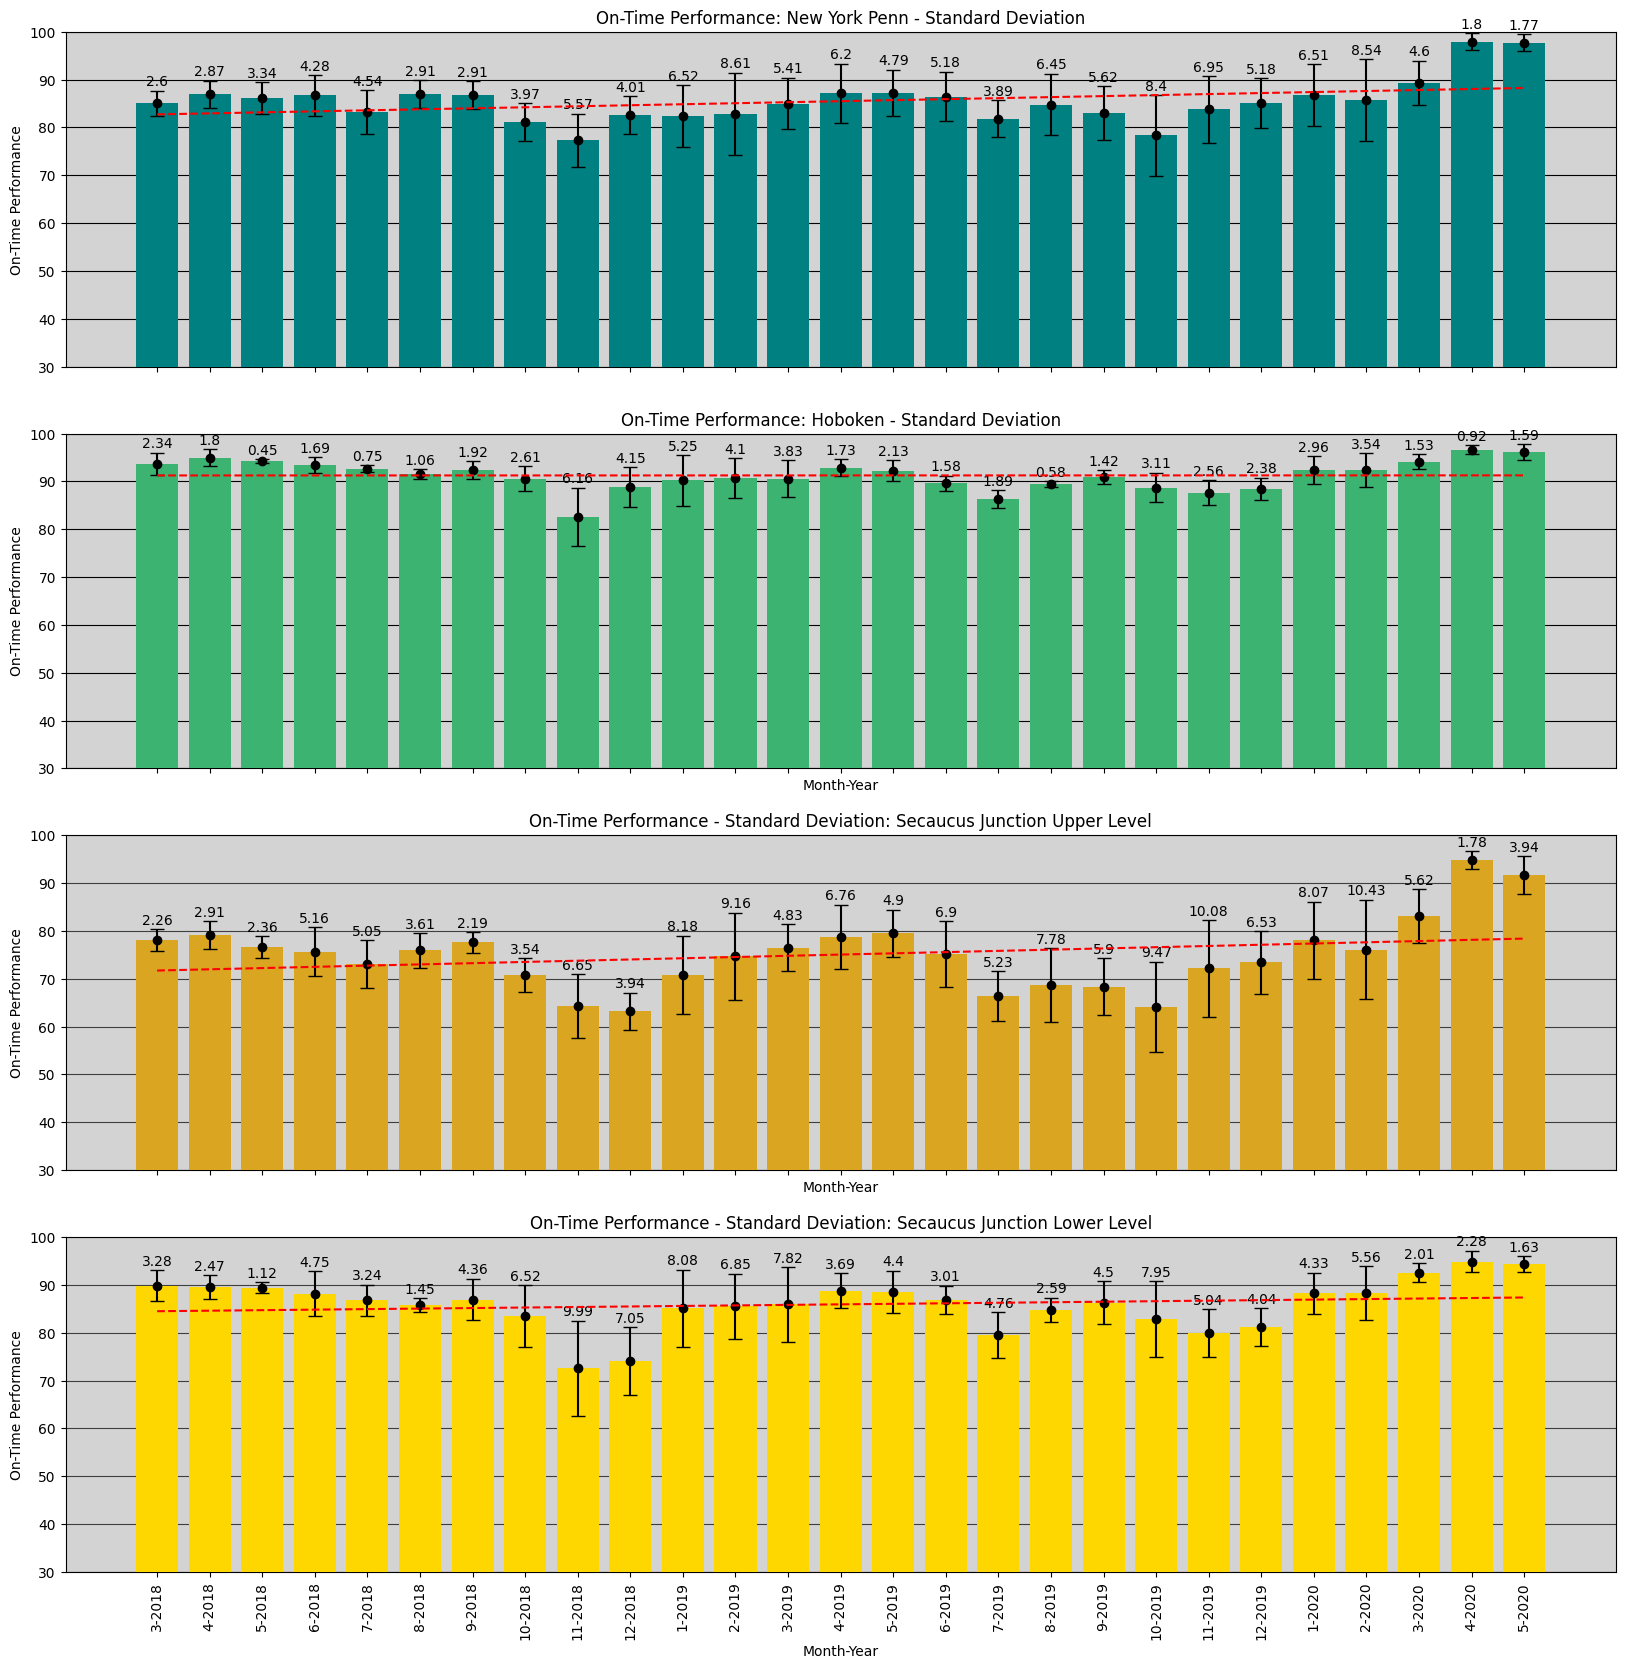

In [85]:

all_services['date'] = pd.to_datetime(all_services['date'])
all_services['year'] = all_services['date'].dt.year
all_services['month'] = all_services['date'].dt.month

otps_by_month_year_ny = all_services.groupby(['year', 'month']).apply(lambda x: np.mean(helper.otp_for_destination(x, 'New York Penn Station')))
std_devs_by_month_year_ny = all_services.groupby(['year', 'month']).apply(lambda x: helper.calculate_std_dev(helper.otp_for_destination(x, 'New York Penn Station')))
otps_by_month_year_hoboken = all_services.groupby(['year', 'month']).apply(lambda x: np.mean(helper.otp_for_destination(x, 'Hoboken')))
std_devs_by_month_year_hoboken = all_services.groupby(['year', 'month']).apply(lambda x: helper.calculate_std_dev(helper.otp_for_destination(x, 'Hoboken')))
otps_by_month_year_secup = all_services.groupby(['year', 'month']).apply(lambda x: np.mean(helper.otp_for_destination(x, 'Secaucus Upper Lvl')))
std_devs_by_month_year_secup = all_services.groupby(['year', 'month']).apply(lambda x: helper.calculate_std_dev(helper.otp_for_destination(x, 'Secaucus Upper Lvl')))
otps_by_month_year_seclwr = all_services.groupby(['year', 'month']).apply(lambda x: np.mean(helper.otp_for_destination(x, 'Secaucus Lower Lvl')))
std_devs_by_month_year_seclwr = all_services.groupby(['year', 'month']).apply(lambda x: helper.calculate_std_dev(helper.otp_for_destination(x, 'Secaucus Lower Lvl')))



x_labels = [f"{month}-{year}" for year, month in otps_by_month_year_ny.index]
xpos = np.arange(len(otps_by_month_year_ny))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20), sharex=True)

# Plot New York Penn data
ax1.bar(xpos, otps_by_month_year_ny, color='teal', zorder=3)
ax1.errorbar(xpos, otps_by_month_year_ny, yerr=std_devs_by_month_year_ny, fmt='o', color='black', zorder=3, capsize=5)
for i, (mean, std_dev) in enumerate(zip(otps_by_month_year_ny, std_devs_by_month_year_ny)):
    ax1.text(i, mean + std_dev + 1, round(std_dev, 2), horizontalalignment='center')
slope, intercept = np.polyfit(xpos, otps_by_month_year_ny, 1)
ax1.plot(xpos, slope*xpos + intercept, color='red', linestyle='--',zorder=6)
ax1.set_facecolor('lightgray')
ax1.set_ylabel('On-Time Performance')
ax1.set_ylim([30, 100])
ax1.set_title('On-Time Performance: New York Penn - Standard Deviation')
ax1.grid(axis='y', linestyle='-', color='black', zorder = 0)
ax1.set_xticklabels(x_labels, rotation=90)
plt.xticks(xpos, x_labels, rotation=90)

# Plot Hoboken data
ax2.bar(xpos, otps_by_month_year_hoboken, color='mediumseagreen', zorder=3)
ax2.errorbar(xpos, otps_by_month_year_hoboken, yerr=std_devs_by_month_year_hoboken, fmt='o', color='black', zorder=3,capsize=5)
for i, (mean, std_dev) in enumerate(zip(otps_by_month_year_hoboken, std_devs_by_month_year_hoboken)):
    ax2.text(i, mean + std_dev + 1, round(std_dev, 2), horizontalalignment='center')
slope, intercept = np.polyfit(xpos, otps_by_month_year_hoboken, 1)
ax2.plot(xpos, slope*xpos + intercept, color='red', linestyle='--',zorder=6)
ax2.set_xlabel('Month-Year')
ax2.set_ylabel('On-Time Performance')
ax2.set_ylim([30, 100])
ax2.set_title('On-Time Performance: Hoboken - Standard Deviation')
ax2.grid(axis='y', linestyle='-', color='black', zorder = 0)
ax2.set_facecolor('lightgray')
plt.xticks(xpos, x_labels, rotation=90)

# Plot Secaucus Junction Upper Level Data
ax3.bar(xpos, otps_by_month_year_secup, color='goldenrod', zorder=3)
ax3.errorbar(xpos, otps_by_month_year_secup, yerr=std_devs_by_month_year_secup , fmt='o', color='black', zorder=3,capsize=5)

for i, (mean, std_dev) in enumerate(zip(otps_by_month_year_secup, std_devs_by_month_year_secup )):
    ax3.text(i, mean + std_dev + 1, round(std_dev, 2), horizontalalignment='center')

slope, intercept = np.polyfit(xpos, otps_by_month_year_secup, 1)
ax3.plot(xpos, slope*xpos + intercept, color='red', linestyle='--',zorder=6)

ax3.set_xlabel('Month-Year')
ax3.set_ylabel('On-Time Performance')
ax3.set_ylim([30, 100])
ax3.set_title('On-Time Performance - Standard Deviation: Secaucus Junction Upper Level')
ax3.grid(axis='y', linestyle='-', alpha=0.7,color='black',zorder=0)
ax3.set_facecolor('lightgray')
plt.xticks(xpos, x_labels, rotation=90)

# Plot Secaucus Junction Lower Level Data
ax4.bar(xpos, otps_by_month_year_seclwr, color='gold', zorder=3)
ax4.errorbar(xpos, otps_by_month_year_seclwr, yerr=std_devs_by_month_year_seclwr , fmt='o', color='black', zorder=3,capsize=5)

for i, (mean, std_dev) in enumerate(zip(otps_by_month_year_seclwr, std_devs_by_month_year_seclwr )):
    ax4.text(i, mean + std_dev + 1, round(std_dev, 2), horizontalalignment='center')

slope, intercept = np.polyfit(xpos, otps_by_month_year_seclwr, 1)
ax4.plot(xpos, slope*xpos + intercept, color='red', linestyle='--',zorder=6)

ax4.set_xlabel('Month-Year')
ax4.set_ylabel('On-Time Performance')
ax4.set_ylim([30, 100])
ax4.set_title('On-Time Performance - Standard Deviation: Secaucus Junction Lower Level')
ax4.grid(axis='y', linestyle='-', alpha=0.7,color='black',zorder=0)
ax4.set_facecolor('lightgray')
plt.xticks(xpos, x_labels, rotation=90)

plt.show()


# Distributions
This will be visualization of the distribution of delay minutes. Such data can be used to measure the frequency delays either in at a given value or range of values. <br> 

### Frequency of Delays
The first will be a histogam. <b>The Y-axis of this histogram is LOGARITHMIC</b>. This was neccessary because of the positive skew of our data which was making the bars for other values nearly impossible to see. Using such scales should be done only when dealing with a large range of values, in this case the frequency of certain x values. Compressing data like this can be extremely misleading when used inappropriately. <br>

Most of the lines have a lop-sided distribution to the left. Since the lines in North Jersey tend to branch off from the same trunk roads, they should have similar distributions. If we notice the Atlantic City Line however, we'll notice a distribution that is more spread out. This could be interpreted as service being less consistent. There could be a reason for this: It was one of the last lines to have the FRA-mandated Positive Train Control implemented and was shut down from 2018 to 2019. Even when it reopened the line suffered from equipment shortages of PTC-equipped rolling stock (leading to some very odd train consists! cab car sandwiches?!?!?!). 

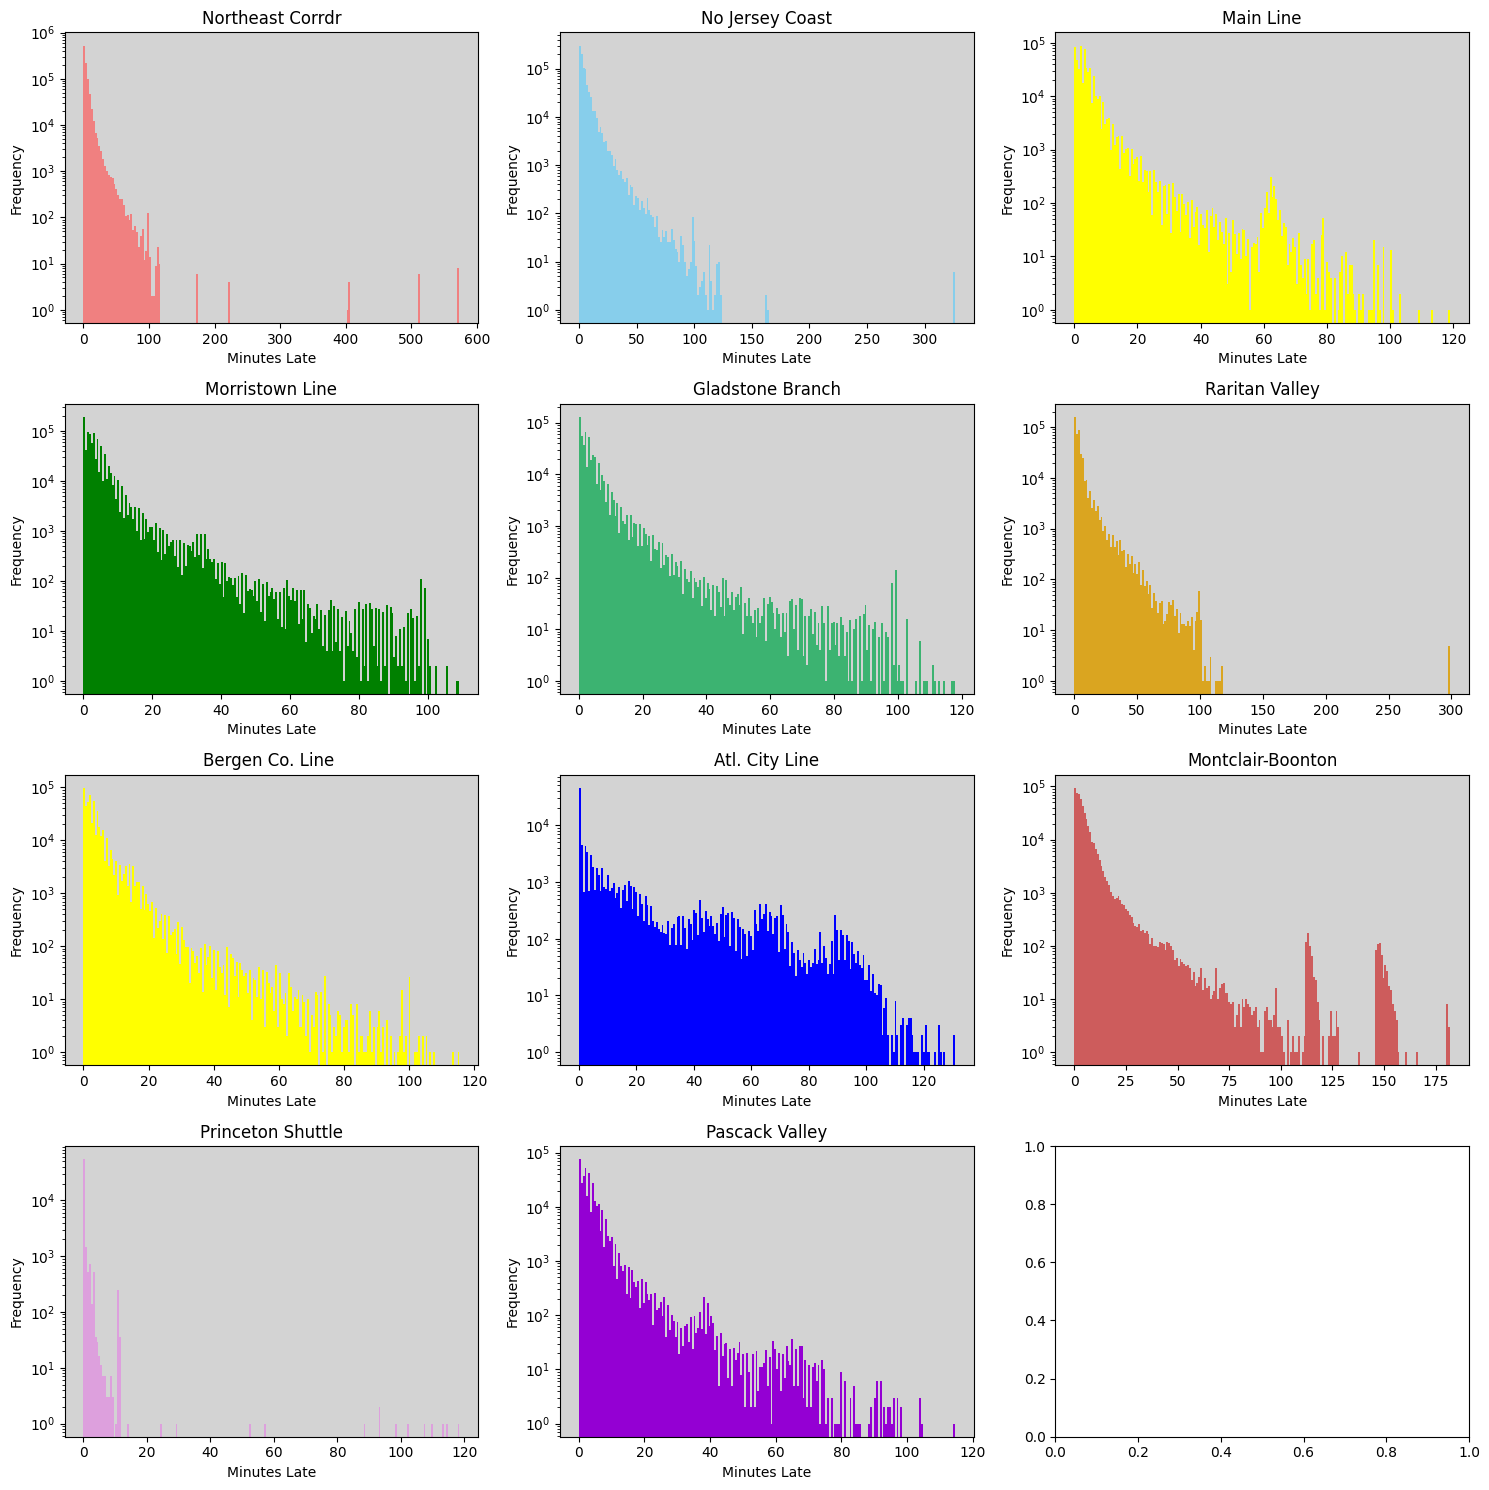

In [86]:
lines = all_services['line'].unique()
# official NJT colors lol
colors = ['lightcoral','skyblue', 'yellow','green','mediumseagreen','goldenrod','yellow','blue', 'indianred', 'plum', 'darkviolet']

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

axs = axs.flatten()

for i, line in enumerate(lines):
    late_mins = all_services.loc[all_services['line'] == line, 'delay_minutes']
    data = late_mins.values
    axs[i].hist(data, bins=200,color=colors[i])
    axs[i].set_title(line)
    axs[i].set_xlabel('Minutes Late')
    axs[i].set_ylabel('Frequency')
    axs[i].set_yscale('log')
    axs[i].set_facecolor('lightgray')
fig.tight_layout()
plt.show()

## Cumulative Probability

Using a CDF plot we can visualize the cumulative probability of a long delay. Again, our data is skewed to the left, so we'll notice a steep upward slope where the line will gradually approach 1.0. In the context of our data this means we have many relatively short delays and fewer long delays. The Y-axis represents the cumulative probability, which is the probability that a randomly selected data point is less than or equal to a given x-value (minutes late) on the x-axis. So, when the Y-value approaches 1.0 at the right end of the plot, it means that nearly all the data values are less than or equal to that value. <br>

Also added is a rug plot to show the location of each data point a long the X-axis and shaded quartile regions to emphasize the proportion of our data values. The area that is unshaded is the 50% interquartile range. This range represents 'typical' delays. However, this is purely mathmetical. It doesn't represent the most frequent delays but rather the delays that are the most representative of the overal distribution.<br>

The Northeast Corridor has a very small Interquartile Range near 0. This can be interpreted as very reliable service. As a direct link to Manhattan that happens to run through the most densely populated state in America, the Northeast Corridor is NJTs busiest rail line. This means frequent service and the highest priority when it comes to staffing, equipment, and maintenance. 

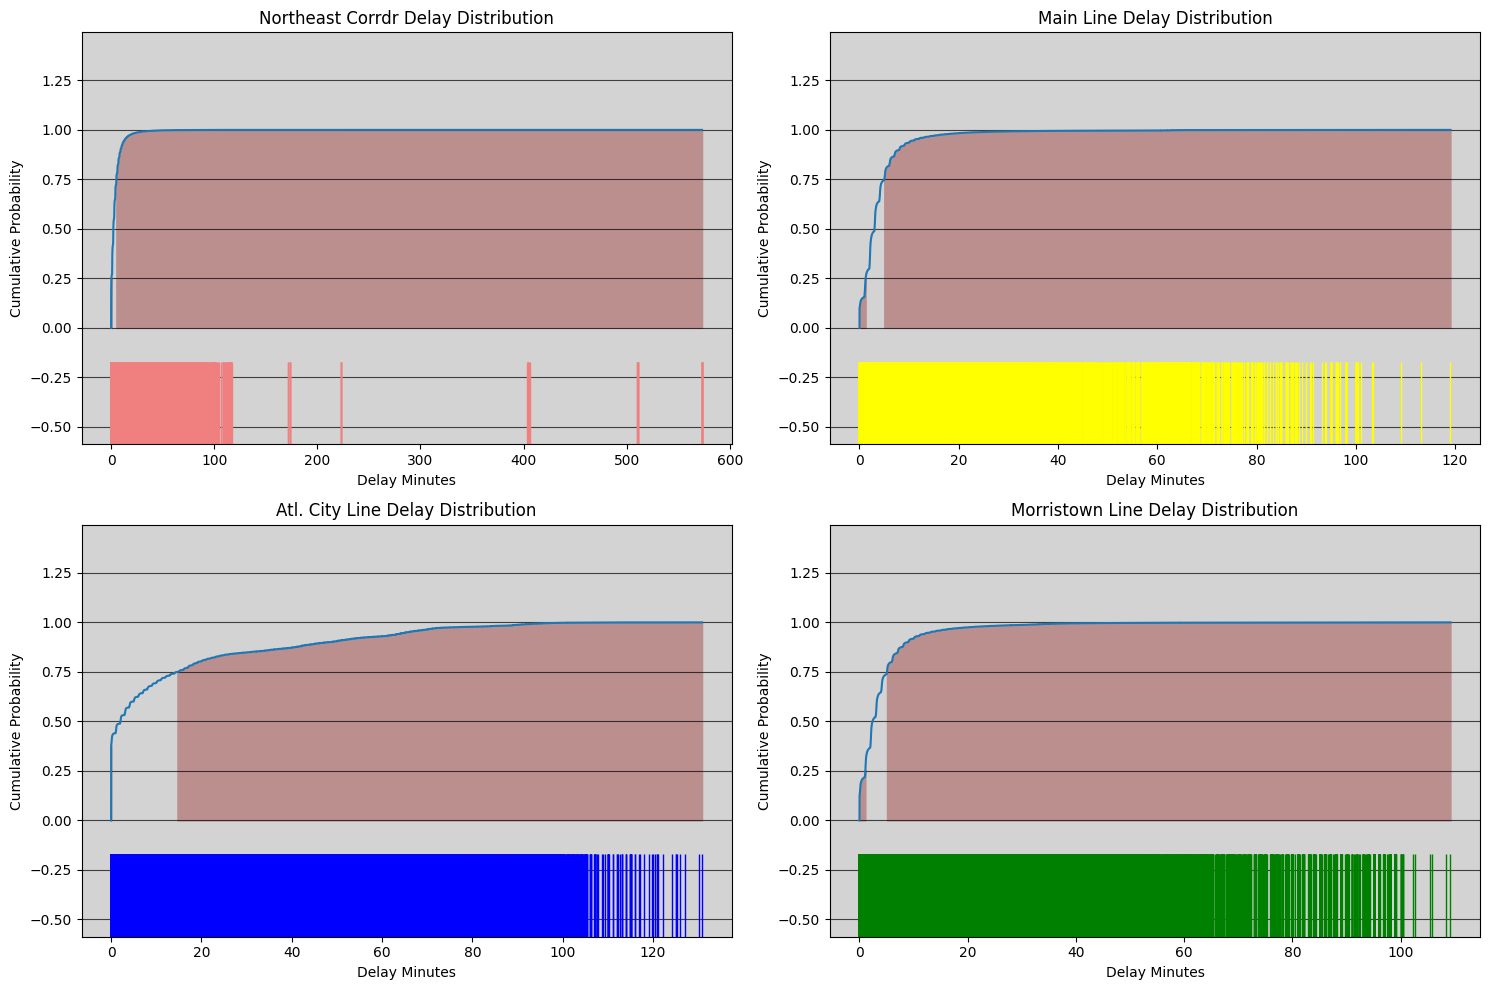

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
lines = ['Northeast Corrdr', 'Main Line', 'Atl. City Line', 'Morristown Line']
colors = ['lightcoral', 'yellow', 'blue', 'green']
for i, line in enumerate(lines):
    data = all_services.loc[all_services['line'] == line, 'delay_minutes']
    sorted_data = np.sort(data)
    yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)
    q1, q3 = np.percentile(data, [25, 75])
    
    sns.rugplot(data, ax=axs[i//2, i%2], color=colors[i], height=0.2)
    axs[i//2, i%2].plot(sorted_data, yvals, zorder=3)
    axs[i//2, i%2].fill_between(sorted_data, 0, yvals, where=(sorted_data<=q1), color='rosybrown')
    axs[i//2, i%2].fill_between(sorted_data, 0, yvals, where=(sorted_data>=q3), color='rosybrown')
    axs[i//2, i%2].set_xlabel('Delay Minutes')
    axs[i//2, i%2].set_ylabel('Cumulative Probability')
    axs[i//2, i%2].set_title(f'{line} Delay Distribution')
    axs[i//2, i%2].grid(axis='y', linestyle='-', alpha=0.7, color='black', zorder=1)
    axs[i//2, i%2].set_facecolor('lightgray')

plt.tight_layout()
plt.show()
